# ЗАБОРИСТЫЕ ИНТЕГРАЛЫ.

Предисловия не будет.

In [1]:
import numpy as np

In [3]:
a, b = 0, np.pi ** 2 / 4

def integrand (x):
    
    return 1 / np.sin ( np.sqrt(x) )

In [4]:
def integrate_rectangles (f, a, b, n ):
    
    x = np.linspace( a, b, n )
    
    y = f (x)
    
    dx = ( b - a ) / n
    
    S = 0
    
    for i in range (n-1) :
        
        S += f( x[i+1] ) * dx  #прямоугольники правые, другие тут плохо смотрятся из-за нуля
        
    return S

Т.к. мы будем сравнивать методы, хорошо бы знать достоверный ответ. К счастью, для этого есть Wolfram Mathematica. Для такого интеграла она выдает значение 3,66386. Попробуем прямолинейную методу для разных n:

In [5]:
print( integrate_rectangles(integrand, a, b, 100) )

print( integrate_rectangles(integrand, a, b, 1000) )

print( integrate_rectangles(integrand, a, b, 10000) )

print( integrate_rectangles(integrand, a, b, 100000) )

print( integrate_rectangles(integrand, a, b, 1000000) )

print( integrate_rectangles(integrand, a, b, 10000000) )


3.41118363861
3.58892414137
3.64068117824
3.65658409673
3.66156602806
3.66313673269


Данные числа говорят сами за себя. Метода сходится невероятно медленно, чего и следовало ожидать.

Попробуем теперь провести реуляризацию следующим образом:

$\int_0^{\pi^2/4}\frac{dx}{\sin \sqrt{x}} =  \int_0^{\pi^2/4}dx(\frac{1}{\sin \sqrt{x}}-\frac{1}{\sqrt{x}})+\pi$ 

In [6]:
def reg_integrand (x):
    
    return 1 / np.sin ( np.sqrt(x) ) - 1 / np.sqrt(x)

Пробуем регуляризованную методу:

In [7]:
print( integrate_rectangles(reg_integrand, a, b, 100) + np.pi)

print( integrate_rectangles(reg_integrand, a, b, 1000) + np.pi)

print( integrate_rectangles(reg_integrand, a, b, 10000) + np.pi)

3.66299430281
3.66378422608
3.66385484634


Очевидно, данная метода работает значительно быстрее, буквально на первом же шагу обгоняя своего конкурента!

Кому-то (крайне придирчивому, я бы сказал глубоко сумасшедшему человеку) могло бы показаться, что это неубедительное доказательство в пользу увеличения скорости сходимости. Специально на такой случай можно построить график зависимости значения интеграла от n:

In [11]:
import matplotlib.pyplot as plt
%matplotlib notebook

k = 1000

In [12]:
ns = [float(i) for i in range(1,k)]

yes = [integrate_rectangles(integrand, a, b, n) for n in range (1,k)]

reg_yes = [integrate_rectangles(reg_integrand, a, b, n) + np.pi for n in range (1,k)]


<IPython.core.display.Javascript object>


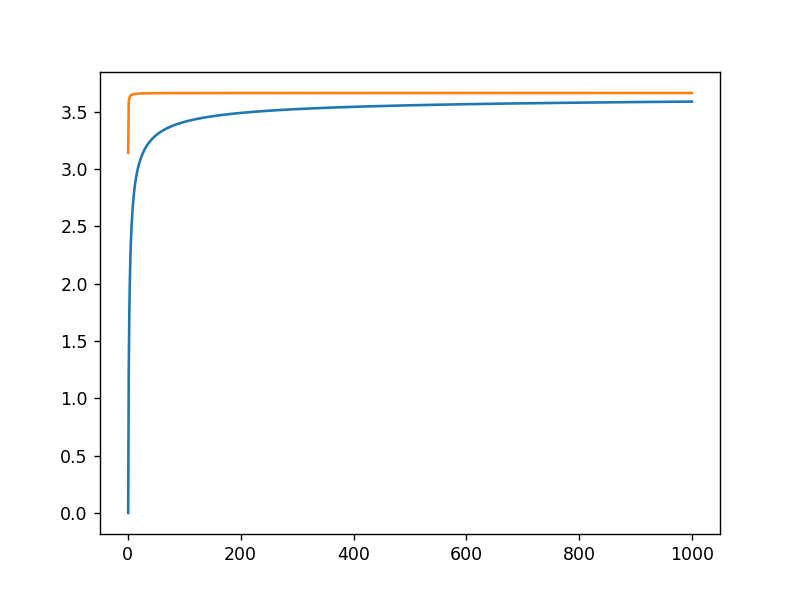

In [13]:
plt.plot(ns,yes)
plt.plot(ns,reg_yes)

Теперь даже самый заядлый скептик увидит, что второй метод действительно эффективнее!

Возьмем ещё интегральчик:

In [14]:
def integrand_2 ( x ) :
    
    return (  1 + x ** 2 ) / np.sqrt ( 1 - x ** 2 )

d = - 1

Для него Mathematica пророчит число 2,35619. Расходимость у него справа, но функция четна, так что вместо того, чтобы писать левые прямоугольники, я лучше просто буду интегрировать от -1 до 0.

In [15]:
print( integrate_rectangles(integrand_2, d, a, 100) )

print( integrate_rectangles(integrand_2, d, a, 1000) )

print( integrate_rectangles(integrand_2, d, a, 10000) )

print( integrate_rectangles(integrand_2, d, a, 100000) )

print( integrate_rectangles(integrand_2, d, a, 1000000) )

2.13236393297
2.28906889514
2.33535759238
2.34964506397
2.3541273821


Ситуация схожа, здесь также имеется очевидная регуляризация:

$\int_0^1 \frac{1+x^2}{\sqrt{1-x^2}}dx = \int_0^1 (\frac{1+x^2}{\sqrt{1-x^2}} - \frac{2}{\sqrt{1-x^2}}) dx + \pi$

In [16]:
def reg_integrand_2 (x):
    
    return (- 1 + x ** 2 ) / np.sqrt ( 1 - x ** 2 )

In [17]:
print( integrate_rectangles(reg_integrand_2, d, a, 100) + np.pi)

print( integrate_rectangles(reg_integrand_2, d, a, 1000) + np.pi)

print( integrate_rectangles(reg_integrand_2, d, a, 10000) + np.pi)

print( integrate_rectangles(reg_integrand_2, d, a, 100000) + np.pi)

2.35934385701
2.35648918968
2.35622332402
2.35619735347


И снова регуляризованный интеграл почти сразу считается с хорошей точностью. Метода работает, и она великолепна. А чтобы убедить в этом самых матерых проверяющих, построим аналогичные прошлому случаю картинки:

In [18]:
yes_2 = [integrate_rectangles(integrand_2, d, a, n) for n in range (1,k)]

reg_yes_2 = [integrate_rectangles(reg_integrand_2, d, a, n) + np.pi for n in range (1,k)]


<IPython.core.display.Javascript object>


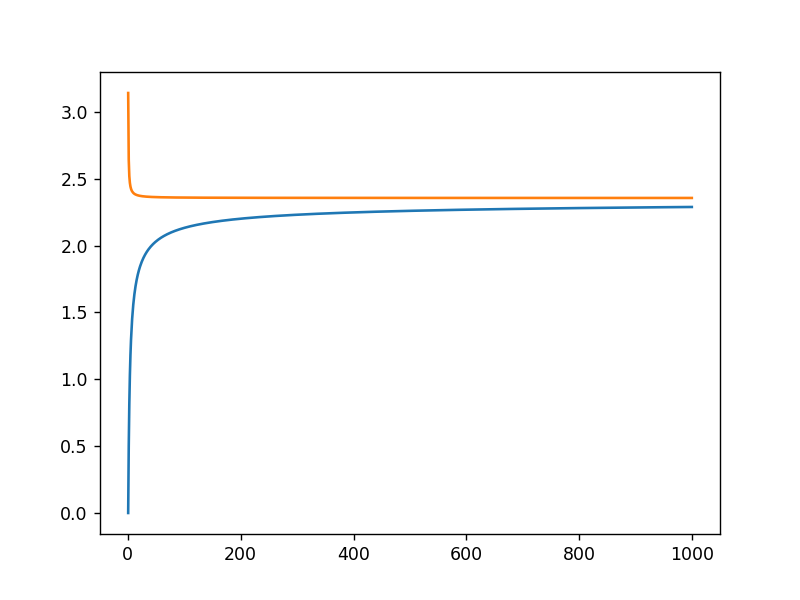

In [19]:
plt.plot(ns,yes_2)
plt.plot(ns,reg_yes_2)

In [2]:
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}